In [58]:
pwd


'/home/wsuser/work/models'

**Understanding The Data**

In [7]:
!pip install tensorflow --upgrade

**Importing requried Libraries**

In [8]:
import numpy
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
metadata_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-98c76e0c-ea4e-4853-9489-8af75c9152c8',
    'IBM_API_KEY_ID': 'mGyVBVPwp6zGVdYT6eDvyxyV2ixwL98voDEG7bCNIDkY',
    'ENDPOINT': 'https://s3.private.us.cloud-object-storage.appdomain.cloud',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'anovelmethodforhandwrittendigitre-donotdelete-pr-1h8zc0ibkabhwd',
    'FILE': 'cloudDeploynment.tgz'
}
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils

**Loading The data**

In [9]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [10]:
print(x_train.shape)

(60000, 28, 28)


In [12]:
print(x_test.shape)

(10000, 28, 28)


**Analyzing the data**

In [13]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [14]:
y_train[0]

5

In [15]:
import matplotlib.pyplot as plt

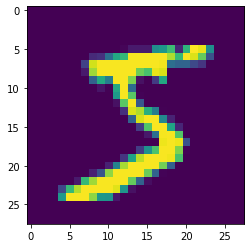

In [16]:
plt.imshow(x_train[0])

**Reshaping the data**

In [17]:
x_train=x_train.reshape(60000,28,28,1).astype('float32')


In [18]:
x_test=x_test.reshape(10000,28,28,1).astype('float32')


**Applying the one hot encoding**

In [19]:
number_of_classes = 10

In [20]:
y_train = np_utils.to_categorical(y_train, number_of_classes)


In [21]:
y_test = np_utils.to_categorical(y_test, number_of_classes)


In [22]:
y_train[0]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

**Add CNN layer**

In [23]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes,activation="softmax"))

2022-11-18 05:03:51.546841: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-18 05:03:51.546933: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)


**Compiling the data**

In [24]:
model.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])


**Train the model**

In [25]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)


Epoch 1/5
1875/1875 [==============================] - 218s 115ms/step - loss: 0.2136 - accuracy: 0.9549 - val_loss: 0.0837 - val_accuracy: 0.9731
Epoch 2/5
1875/1875 [==============================] - 216s 115ms/step - loss: 0.0605 - accuracy: 0.9819 - val_loss: 0.0727 - val_accuracy: 0.9779
Epoch 3/5
1875/1875 [==============================] - 216s 115ms/step - loss: 0.0414 - accuracy: 0.9872 - val_loss: 0.0770 - val_accuracy: 0.9775
Epoch 4/5
1875/1875 [==============================] - 234s 125ms/step - loss: 0.0325 - accuracy: 0.9898 - val_loss: 0.0913 - val_accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 222s 118ms/step - loss: 0.0260 - accuracy: 0.9920 - val_loss: 0.1213 - val_accuracy: 0.9765


**Observing the metrics**

In [27]:
metrics=model.evaluate(x_test,y_test,verbose=0)


In [28]:
print("Mertics(Test loss & Test Accuracy):")
print(metrics)

Mertics(Test loss & Test Accuracy):
[0.12133007496595383, 0.9764999747276306]


**Test the Model**

In [29]:
prediction=model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 0s 458ms/step
[[5.2925492e-10 5.8847684e-18 1.6868391e-09 4.3178779e-06 2.5359627e-20
  1.7371155e-16 2.8430108e-16 9.9999571e-01 2.3031984e-11 9.5942340e-13]
 [1.5611018e-09 4.5281354e-13 1.0000000e+00 1.4042769e-09 2.2213555e-17
  2.2418680e-20 1.8649513e-09 6.4940576e-23 8.2371189e-14 3.7932300e-22]
 [4.9684127e-06 9.9929810e-01 4.5591307e-05 7.9514155e-09 7.2092967e-05
  7.1360978e-07 1.6776596e-09 2.0522807e-08 5.7851616e-04 2.1686775e-09]
 [9.9999464e-01 2.1174822e-14 5.3982171e-06 1.0012786e-12 3.9952264e-14
  1.2786794e-10 9.7763431e-10 3.0541818e-13 1.9181581e-08 8.0038554e-09]]


**Observing the metrics**

In [30]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("Mertics(Test loss & Test Accuracy):")
print(metrics)

Mertics(Test loss & Test Accuracy):
[0.12133007496595383, 0.9764999747276306]


**Test the model**

In [31]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 52ms/step
[[1.2074731e-15 4.8411541e-13 1.4582432e-13 2.1341302e-06 1.1889552e-05
  8.5195716e-06 1.7632404e-16 8.4295193e-09 4.9742374e-07 9.9997699e-01]]


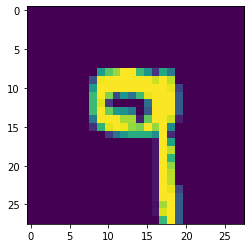

In [32]:
plt.imshow(x_test[6000])

In [33]:
import numpy as np
print(np.argmax(prediction, axis=1))

[9]


In [34]:
np.argmax(y_test[6000:6001])

9

Save the model

In [35]:
model.save('models/mnistCNN.h5')

In [36]:
cd models

/home/wsuser/work/models


In [37]:
!tar -zcvf cloudDeploynment.tgz mnistCNN.h5

mnistCNN.h5


In [38]:
ls -1

cloudDeploynment.tgz
mnistCNN.h5


In [39]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 11.6 MB/s eta 0:00:01


Cloud deploy

In [40]:
!pip install -U ibm-watson-machine-learning

In [41]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"5JwMvmSvBMNPmlm6akUFfpjBBdwdplOmuyNiqiAxMi_r"
}
client = APIClient(credentials)
client

In [42]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/38f53e46a5a34c8c95a7e4b3db967372:66974a17-7b18-4256-a246-ee1be28b8047::',
      'guid': '66974a17-7b18-4256-a246-ee1be28b8047',
      'name': 'Watson Machine Learning-tz',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'models',
    'scope': {'bss_account_id': '38f53e46a5a34c8c95a7e4b3db967372'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': 'b0ab2214-832f-4501-8a41-bebaac2996c9',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': '06aeed9907414cd19b132b1f61d051f1',
        'api_key': 'heU5l1BTj2lgFNoiWuXGVIqpZ5LKlNiqReJlJ0gwTl0Q',
        'secret_access_key': '6ac8bb820511ffc2940d276bdfb0163ee0028f35abdb2f1b',
        'service_id': 'ServiceId-bf9ec439-a1a8-4557-8025-b0c86aaf9a9b'},
       'editor': {'access_key_id': 'e5c810027aa44da88ea1fe97f8194470',
        'api_key': 'XY

In [44]:
def guid_from_space_name(client,deploy):
    space = client.spaces.get_details()
    return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [45]:
space_uid = guid_from_space_name(client,'models')
print("Space UID = " + space_uid)

Space UID = ccee870f-8819-4adc-81b1-318676ab2836


In [46]:
client.set.default_space(space_uid)

'SUCCESS'

In [47]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [48]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [49]:
model_details = client.repository.store_model(model='cloudDeploynment.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Digit Recognition System",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [50]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-18T05:29:39.278Z',
  'id': '30bb92a2-6ce6-4a3a-84ec-6d1b8ed5a33e',
  'modified_at': '2022-11-18T05:29:41.723Z',
  'name': 'Digit Recognition System',
  'owner': 'IBMid-663001RPF2',
  'resource_key': '8bd756d9-4cb2-4eb1-93c9-bddd84939d3f',
  'space_id': 'ccee870f-8819-4adc-81b1-318676ab2836'},
 'system': {'warnings': []}}

In [51]:
model_id = client.repository.get_model_id(model_details)
model_id

'30bb92a2-6ce6-4a3a-84ec-6d1b8ed5a33e'

In [52]:
client.repository.download(model_id,'DigitRecog_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecog_IBM_model.tar.gz'


'/home/wsuser/work/models/DigitRecog_IBM_model.tar.gz'

In [53]:
ls

cloudDeploynment.tgz  DigitRecog_IBM_model.tar.gz  mnistCNN.h5


Test Model

In [54]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [55]:
model = load_model("mnistCNN.h5")

In [69]:
import matplotlib.pyplot as plt   #used for data visualization

In [90]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='mGyVBVPwp6zGVdYT6eDvyxyV2ixwL98voDEG7bCNIDkY',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'anovelmethodforhandwrittendigitre-donotdelete-pr-1h8zc0ibkabhwd'
object_key = 'mnist-dataset-1024x424_10.png'

streaming_body_4 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']



In [91]:
img = Image.open(streaming_body_4).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # re

In [92]:
img

In [93]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) 

In [95]:
pred = model.predict(im2arr)
print(pred)

1/1 [==============================] - 0s 138ms/step
[[2.6220290e-11 4.9045092e-09 3.8252384e-07 1.1215448e-04 1.8820243e-08
  2.2485723e-07 1.0888482e-11 2.4561841e-10 9.9988472e-01 2.5175696e-06]]


In [ ]:
print(np.argmax(pred, axis=1)) #printing our Labels
